In [9]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
x = np.linspace(-10, 10, 500)
y = 2*x - 1
y_with_noise = y.reshape(500, 1) + np.random.normal(0, 1, size=(500, 1))

In [20]:
x_out = np.linspace(-10, 10, 100)
y_out = np.array([1 + np.random.normal(0,1,size=1) for i in range(100)])

In [16]:
X = np.hstack([x, x_outliers]).reshape(600, 1)
Y = np.vstack([y_with_noise, y_outliers])

In [27]:
def loss_function(coeffs):
    loss = sum((Y - (coeffs[1]*X + coeffs[0]))**2) + sum(np.abs(coeffs)**2)
    return loss

In [32]:
result = minimize(loss_function, [0.1, 0.1])

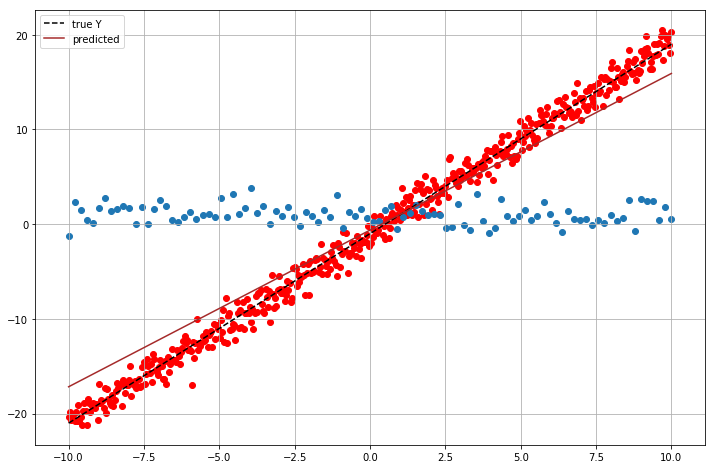

In [41]:
plt.figure(figsize=(12, 8))
plt.scatter(x, y_with_noise, c="red")
plt.plot(x, y, "--", label="true Y", c="black")
plt.scatter(x_outliers, y_outliers)

b, a = result.x
y_predicted = a*x + b
plt.plot(x, y_predicted, c="brown", label="predicted");
plt.legend()
plt.grid();